# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tqdm import tqdm, trange

from SGA import SGA

%matplotlib inline

## Input data

In [2]:
def compute_dists(coords, n):
    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    return A

In [3]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = compute_dists(coords, n)
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


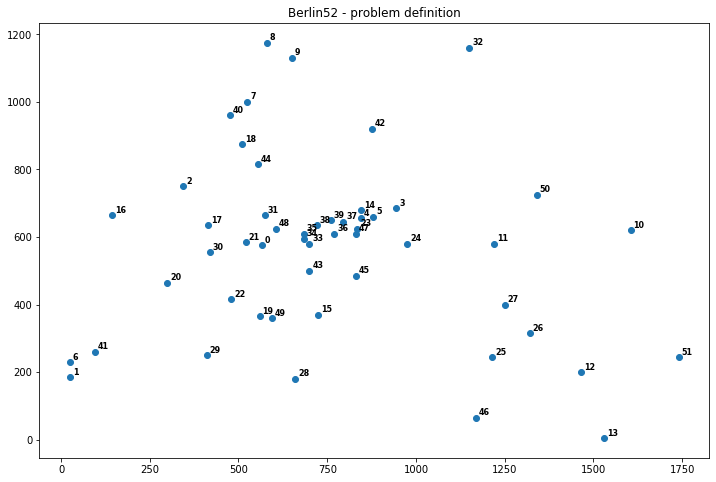

In [4]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

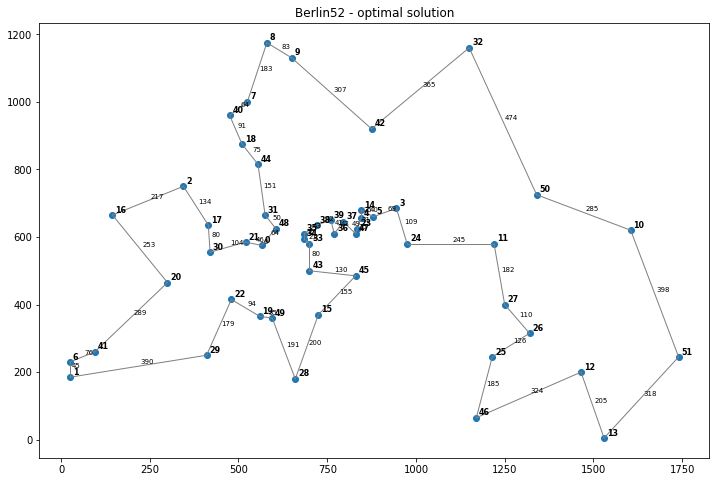

In [5]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [6]:
def tsp_objective_function(p, dist):
    s = 0.0
    for i in range(len(p)):
        s += dist[p[i-1], p[i]]
    return s

In [7]:
print(tsp_objective_function(p, A), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


In [8]:
N = 5

## Random Sampling

In [8]:
T = 1000000

costs_rs = np.zeros((N, T))

for i in trange(N, position=0, leave=True):
    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for t in range(T):
        permutations[t, :] = np.random.permutation(n)
        costs_rs[i][t] = tsp_objective_function(permutations[t, :])

    p = permutations[costs.argmin(), :]

100%|██████████| 5/5 [03:39<00:00, 43.86s/it]


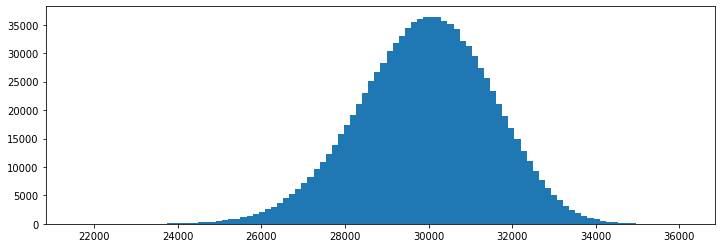

0.0 0.0


In [9]:
plt.figure(figsize=(12,4))
plt.hist(costs_rs[0], bins=100)
plt.show()

print(costs_rs.mean(), costs_rs.std())

## Simulated Annealing

In [10]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [12]:
T = 500000
radius = 1
alpha = 1.0

costs_sa = np.zeros((N, T))

for i in trange(N, position=0, leave=True):
    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs_sa[i][t] = p_cost

100%|██████████| 5/5 [02:53<00:00, 34.71s/it]


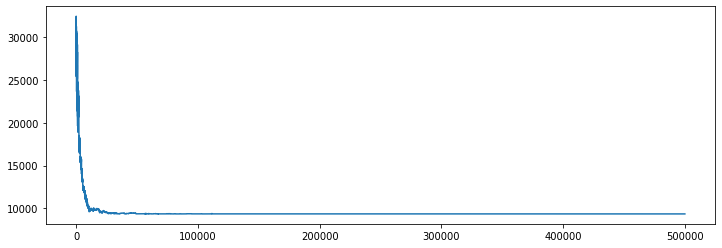

In [13]:
plt.figure(figsize=(12,4))
plt.plot(costs_sa[0])
plt.show()

## SGA-PMX

In [9]:
def PMX(ind1, ind2, separator_no=2):
    new_ind1, new_ind2 = ind1.copy(), ind2.copy()
    idxs = sorted(np.random.choice(len(ind1), separator_no, replace=False))
    
    group = np.random.choice(separator_no-1)
    start, end = idxs[group], idxs[group+1]
    
    tmp = ind1[start:end].copy()
    ind1[start:end] = ind2[start:end]
    ind2[start:end] = tmp
    
    for i in range(len(ind1)):
        if start <= i < end:
            continue
            
        while ind1[i] in ind1[start:end]:
            # get elem from the other ind
            idx_of_elem = np.nonzero(ind1[start:end] == ind1[i])[0][0]
            ind1[i] = ind2[start+idx_of_elem]
        
        while ind2[i] in ind2[start:end]:
            # get elem from the other ind
            idx_of_elem = np.nonzero(ind2[start:end] == ind2[i])[0][0]
            ind2[i] = ind1[start+idx_of_elem]

    return ind1, ind2

In [10]:
def reverse_sequence_mutation(p, *args):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [11]:
number_of_iterations=250

In [17]:
costs_sga = np.zeros((N, number_of_iterations))
for i in trange(N, position=0, leave=True):
    sga = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, 
              objective_func=tsp_objective_function, distance_matrix=A,
              mutation_func=reverse_sequence_mutation, replace_method='mu+lambda', number_of_offspring=500, 
              crossover_probability=0.95, mutation_probability=0.25, number_of_iterations=number_of_iterations)
    sga.run()
    costs_sga[i] = sga.get_costs()

100%|██████████| 5/5 [02:13<00:00, 26.61s/it]


### Compare Random Sampling, Simulated Annealing, SGA-PMX

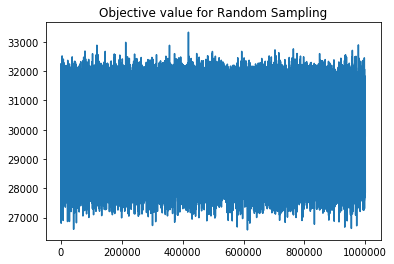

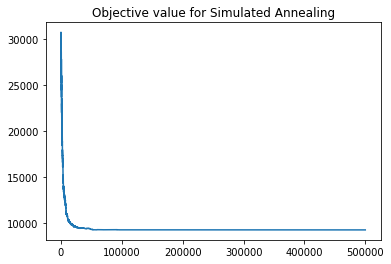

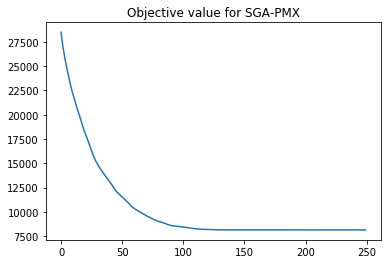

In [21]:
plt.title('Objective value for Random Sampling')
plt.plot(costs_rs.mean(axis=0))
plt.show()

plt.title('Objective value for Simulated Annealing')
plt.plot(costs_sa.mean(axis=0))
plt.show()

plt.title('Objective value for SGA-PMX')
plt.plot(costs_sga.mean(axis=0))
plt.show()

### SGA with different mutation func: transposition of 2 elements

In [12]:
def mutate_transpose_2_elems(ind, *args):
    idx1, idx2 = np.random.choice(ind, 2, replace=False)
    ind[idx1], ind[idx2] = ind[idx2], ind[idx1]
    return ind

In [34]:
costs_transpose_sga = np.zeros((N, number_of_iterations))
for i in trange(N, position=0, leave=True):
    sga = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, 
              objective_func=tsp_objective_function, distance_matrix=A, 
              mutation_func=mutate_transpose_2_elems, replace_method='mu+lambda', 
              number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
              number_of_iterations=number_of_iterations)
    sga.run()
    costs_transpose_sga[i] = sga.get_costs()

100%|██████████| 5/5 [02:14<00:00, 26.91s/it]


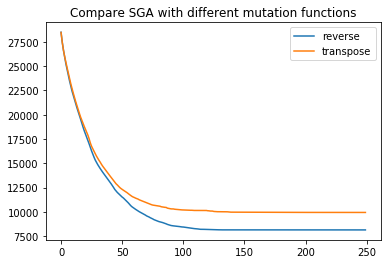

Best for reverse: 8149.0, transpose: 9946.0


In [38]:
plt.title('Compare SGA with different mutation functions')
plt.plot(costs_sga.mean(axis=0), label='reverse')
plt.plot(costs_transpose_sga.mean(axis=0), label='transpose')
plt.legend()
plt.show()
print(f'Best for reverse: {round(costs_sga.mean(axis=0).min())}, transpose: {round(costs_transpose_sga.mean(axis=0).min())}')

### Test:
- bayg29, 
- bays29, 
- kroA100, 
- kroA150, 
- kroA200

#### Test kroA100

In [23]:
n = 100

data = open('data/kroA100.tsp').read()
coords = []
for row in data.split('\n')[6:]:
    coords.extend(row.split()[1:])
coords = np.array(list(map(int, coords)))
coords = coords.reshape(n, 2)

dists = compute_dists(coords, n)

In [24]:
sga_transpose = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=mutate_transpose_2_elems, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_transpose.run(with_tqdm=True)

sga_reverse = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_reverse.run(with_tqdm=True)

100%|██████████| 250/250 [00:50<00:00,  4.99it/s]


Best for transposing mutation function: 51265.0, reverse sequence: 27277.0


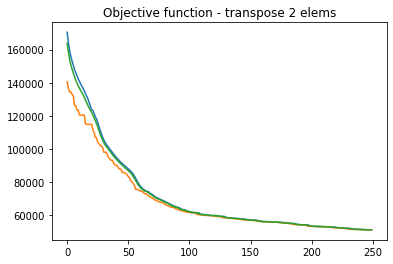

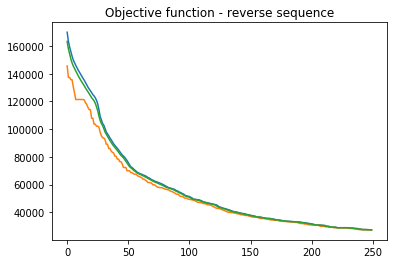

In [25]:
print(f'Best for transposing mutation function: {round(sga_transpose.min_costs.min())}, reverse sequence: {round(sga_reverse.min_costs.min())}')
sga_transpose.plot_costs('Objective function - transpose 2 elems')
sga_reverse.plot_costs('Objective function - reverse sequence')

#### Test kroA150

In [26]:
n = 150

data = open('data/kroA150.tsp').read()
coords = []
for row in data.split('\n')[6:]:
    coords.extend(row.split()[1:])
coords = np.array(list(map(int, coords)))
coords = coords.reshape(n, 2)

dists = compute_dists(coords, n)

In [27]:
sga_transpose = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=mutate_transpose_2_elems, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_transpose.run(with_tqdm=True)

sga_reverse = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_reverse.run(with_tqdm=True)

100%|██████████| 250/250 [01:17<00:00,  3.24it/s]


Best for transposing mutation function: 77497.0, reverse sequence: 53862.0


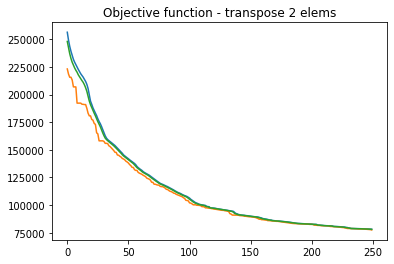

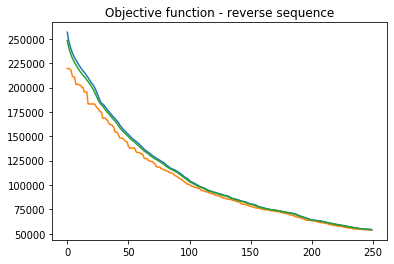

In [28]:
print(f'Best for transposing mutation function: {round(sga_transpose.min_costs.min())}, reverse sequence: {round(sga_reverse.min_costs.min())}')
sga_transpose.plot_costs('Objective function - transpose 2 elems')
sga_reverse.plot_costs('Objective function - reverse sequence')

#### Test kroA200

In [29]:
n = 200

data = open('data/kroA200.tsp').read()
coords = []
for row in data.split('\n')[6:]:
    coords.extend(row.split()[1:])
coords = np.array(list(map(int, coords)))
coords = coords.reshape(n, 2)

dists = compute_dists(coords, n)

In [30]:
sga_transpose = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=mutate_transpose_2_elems, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_transpose.run(with_tqdm=True)

sga_reverse = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_reverse.run(with_tqdm=True)

100%|██████████| 250/250 [01:42<00:00,  2.44it/s]


Best for transposing mutation function: 110609.0, reverse sequence: 84380.0


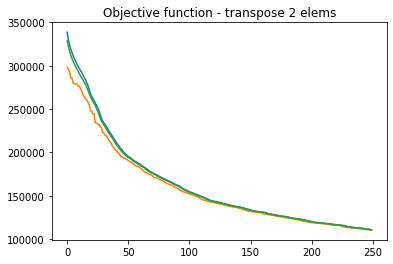

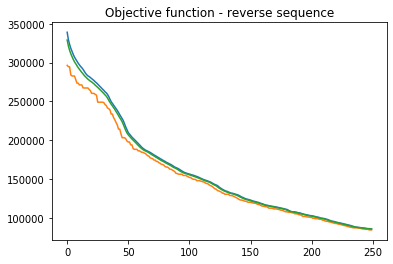

In [31]:
print(f'Best for transposing mutation function: {round(sga_transpose.min_costs.min())}, reverse sequence: {round(sga_reverse.min_costs.min())}')
sga_transpose.plot_costs('Objective function - transpose 2 elems')
sga_reverse.plot_costs('Objective function - reverse sequence')

#### Test bays29

In [14]:
n = 29

data = open('data/bays29.tsp').read()
coords = []
for row in data.split('\n')[38:]:
    coords.extend(row.split()[1:])
coords = np.array(list(map(lambda x: int(float(x)), coords)))
coords = coords.reshape(n, 2)

dists = compute_dists(coords, n)

In [25]:
sga_transpose = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=mutate_transpose_2_elems, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_transpose.run(with_tqdm=True)

sga_reverse = SGA(population_size=500, chromosome_length=n, crossover_func=PMX, objective_func=tsp_objective_function,
         distance_matrix=dists, mutation_func=reverse_sequence_mutation, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=number_of_iterations)
sga_reverse.run(with_tqdm=True)

100%|██████████| 250/250 [00:17<00:00, 14.21it/s]


Best for transposing mutation function: 10870.0, reverse sequence: 9888.0


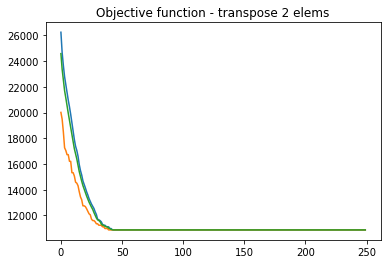

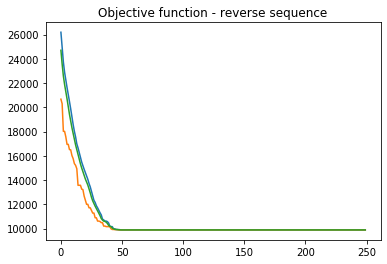

In [26]:
print(f'Best for transposing mutation function: {round(sga_transpose.min_costs.min())}, reverse sequence: {round(sga_reverse.min_costs.min())}')
sga_transpose.plot_costs('Objective function - transpose 2 elems')
sga_reverse.plot_costs('Objective function - reverse sequence')

100%|██████████| 50/50 [00:04<00:00, 11.99it/s]


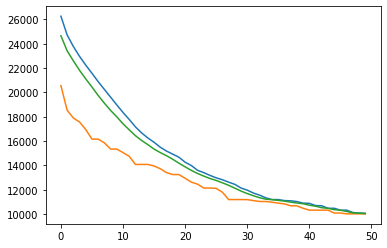

 11%|█         | 27/250 [00:19<00:19, 11.44it/s]

In [18]:
sga_transpose = SGA(population_size=500, chromosome_length=n, crossover_func=PMX,
         distance_matrix=dists, mutation_func=mutate_transpose_2_elems, replace_method='mu+lambda',
         number_of_offspring=500, crossover_probability=0.95, mutation_probability=0.25, 
         number_of_iterations=50)
sga_transpose.run(with_tqdm=True)
sga_transpose.plot_costs()